In [2]:
data = pd.read_csv("D:/PROJECTS/intel grand challenge/unnati_phase1_data_revised/unnati_phase1_data_revised.csv")
data.head()

,Alert,Date,Time,Lat,Long,Vehicle,Speed
0,cas_ldw,2022-06-01,05:36:36,12.887403,80.083412,2846,48
1,cas_ldw,2022-06-01,05:36:47,12.892586,80.085794,2846,58
2,cas_ldw,2022-06-01,05:37:04,12.894932,80.087564,2846,57
3,cas_ldw,2022-06-01,05:37:31,12.898267,80.090062,2846,49
4,cas_ldw,2022-06-01,05:38:08,12.901594,80.092538,2846,58


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21325 entries, 0 to 21324
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Alert    21325 non-null  object 
 1   Date     21325 non-null  object 
 2   Time     21325 non-null  object 
 3   Lat      21325 non-null  float64
 4   Long     21325 non-null  float64
 5   Vehicle  21325 non-null  int64  
 6   Speed    21325 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 1.1+ MB


In [4]:
data.describe


<bound method NDFrame.describe of          Alert        Date      Time        Lat       Long  Vehicle  Speed
0      cas_ldw  2022-06-01  05:36:36  12.887403  80.083412     2846     48
1      cas_ldw  2022-06-01  05:36:47  12.892586  80.085794     2846     58
2      cas_ldw  2022-06-01  05:37:04  12.894932  80.087564     2846     57
3      cas_ldw  2022-06-01  05:37:31  12.898267  80.090062     2846     49
4      cas_ldw  2022-06-01  05:38:08  12.901594  80.092538     2846     58
...        ...         ...       ...        ...        ...      ...    ...
21320  cas_pcw  2022-08-31  18:12:29  13.070668  80.265539     5339     30
21321  cas_pcw  2022-08-31  18:13:01  13.071554  80.264616     5339     34
21322  cas_hmw  2022-08-31  18:15:05  13.071181  80.258729     5339     24
21323  cas_pcw  2022-08-31  18:16:35  13.067723  80.255065     5339     23
21324  cas_hmw  2022-08-31  18:19:23  13.065917  80.247777     5339     22

[21325 rows x 7 columns]>

In [5]:
data.shape

(21325, 7)

In [6]:
data["Alert"].value_counts()

Alert
cas_hmw    12328
cas_ldw     6431
cas_pcw     1976
cas_fcw      590
Name: count, dtype: int64

In [7]:
data["Vehicle"].value_counts()

Vehicle
805     6875
5339    5842
2846    5686
3143    2904
1995      18
Name: count, dtype: int64

In [8]:
data['Vehicle'].value_counts().count()

5

In [9]:
data["Speed"].value_counts()

Speed
58    1956
57    1316
0      982
56     583
52     501
      ... 
2       24
1       21
63      14
64       5
65       2
Name: count, Length: 66, dtype: int64

In [10]:
data["Speed"].value_counts().count()

66

In [11]:
data.columns

Index(['Alert', 'Date', 'Time', 'Lat', 'Long', 'Vehicle', 'Speed'], dtype='object')

In [12]:
data.groupby('Alert')['Speed'].max()


Alert
cas_fcw    63
cas_hmw    64
cas_ldw    65
cas_pcw    61
Name: Speed, dtype: int64

In [13]:
data.groupby(['Alert']).max()

,Date,Time,Lat,Long,Vehicle,Speed
Alert,,,,,,
cas_fcw,2022-08-31,21:03:34,13.169853,80.303777,5339,63
cas_hmw,2022-08-31,21:05:51,13.182797,80.316079,5339,64
cas_ldw,2022-08-31,21:06:50,13.177723,80.313772,5339,65
cas_pcw,2022-08-31,20:12:04,13.169852,80.294460,5339,61


In [5]:
import pandas as pd
from sklearn.cluster import DBSCAN

# Load the ADAS alerts dataset
data = pd.read_csv('D:/PROJECTS/intel grand challenge/unnati_phase1_data_revised/unnati_phase1_data_revised.csv')

# Convert latitude and longitude columns to radians
data['lat_rad'] = data['Lat'].apply(lambda x: x * (3.141592653589793 / 180))
data['lon_rad'] = data['Long'].apply(lambda x: x * (3.141592653589793 / 180))

# Define the epsilon (distance) and minimum samples for DBSCAN
epsilon = 0.1  # You may need to adjust this based on your data and desired cluster size
min_samples = 5

# Initialize and fit the DBSCAN model
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples, algorithm='ball_tree', metric='haversine')
data['cluster'] = dbscan.fit_predict(data[['lat_rad', 'lon_rad']])

# Find the cluster with the most alerts as the potential blackspot
blackspot_cluster = data['cluster'].value_counts().idxmax()
blackspot_data = data[data['cluster'] == blackspot_cluster]

# Calculate the centroid of the blackspot region
blackspot_centroid = (
    blackspot_data['Lat'].mean(),
    blackspot_data['Long'].mean()
)

# Print the blackspot centroid
print("Blackspot Centroid Coordinates:")
print(blackspot_centroid)


Blackspot Centroid Coordinates:
(12.900457998874561, 80.118533369238)


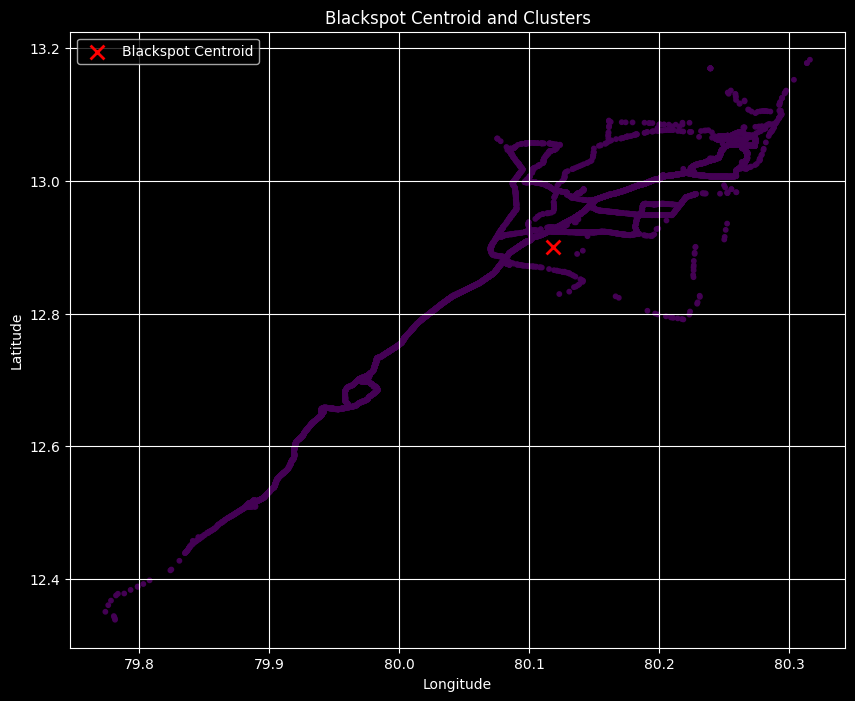

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import DBSCAN


# Load the ADAS alerts dataset
data = pd.read_csv('D:/PROJECTS/intel grand challenge/unnati_phase1_data_revised/unnati_phase1_data_revised.csv')

# Convert latitude and longitude columns to radians
data['lat_rad'] = data['Lat'].apply(lambda x: x * (3.141592653589793 / 180))
data['lon_rad'] = data['Long'].apply(lambda x: x * (3.141592653589793 / 180))

# Define the epsilon (distance) and minimum samples for DBSCAN
epsilon = 0.1
min_samples = 5

# Initialize and fit the DBSCAN model
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples, algorithm='ball_tree', metric='haversine')
data['cluster'] = dbscan.fit_predict(data[['lat_rad', 'lon_rad']])

# Find the cluster with the most alerts as the potential blackspot
blackspot_cluster = data['cluster'].value_counts().idxmax()
blackspot_data = data[data['cluster'] == blackspot_cluster]

# Calculate the centroid of the blackspot region
blackspot_centroid = (
    blackspot_data['Lat'].mean(),
    blackspot_data['Long'].mean()
)

# Create a scatter plot to visualize the blackspot centroid
plt.figure(figsize=(10, 8))
plt.scatter(data['Long'], data['Lat'], c=data['cluster'], cmap='viridis', marker='o', s=10)
plt.scatter(blackspot_centroid[1], blackspot_centroid[0], color='red', marker='x', s=100, label='Blackspot Centroid',linewidths=2)

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Blackspot Centroid and Clusters')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


Text(0, 0.5, 'COUNT ')

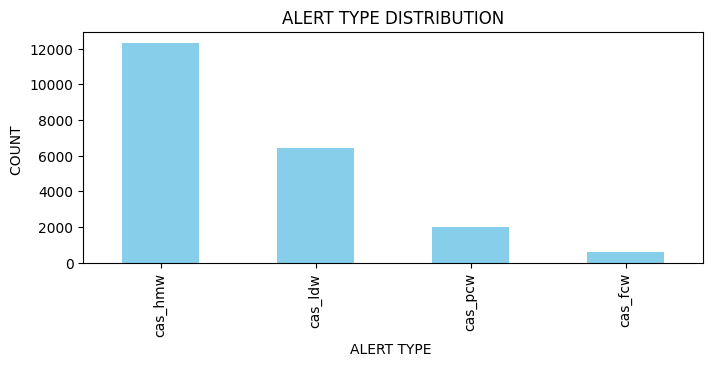

In [19]:
import pandas as pd 
import matplotlib.pyplot as plt

data = pd.read_csv("D://PROJECTS/intel grand challenge/unnati_phase1_data_revised/unnati_phase1_data_revised.csv")
alert_C = data["Alert"].value_counts()
data['Alert_counts'] = data["Alert"].value_counts()
plt.figure(figsize = (8,3))
alert_C.plot(kind = 'bar',color = 'skyblue')
plt.title('ALERT TYPE DISTRIBUTION')
plt.xlabel("ALERT TYPE ")
plt.ylabel("COUNT ")


C:\Users\ravit\AppData\Local\Temp\ipykernel_34308\821918679.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Time'] = pd.to_datetime(data['Time'])


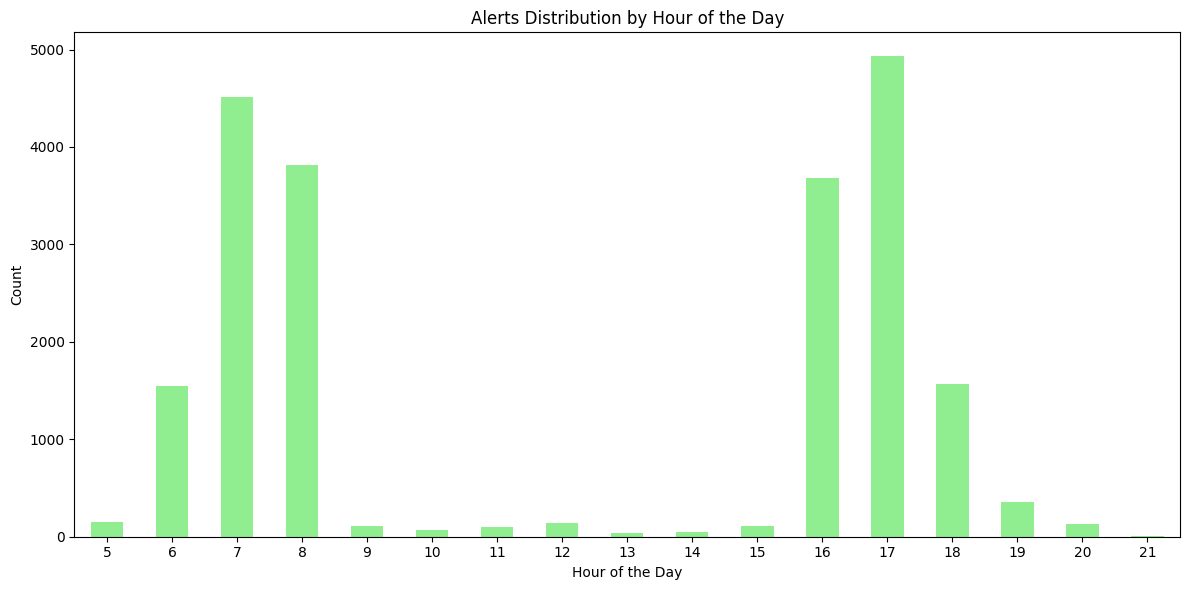

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with a timestamp column 'Timestamp'
# Example data:
# df = pd.DataFrame({'Timestamp': ['2023-09-10 08:30:00', '2023-09-10 12:15:00', ...]})

# Convert the 'Timestamp' column to a datetime object
data['Time'] = pd.to_datetime(data['Time'])

# Extract hours from the timestamp
data['Hour'] =data['Time'].dt.hour

# Group by hour and count occurrences
hourly_counts = data['Hour'].value_counts().sort_index()

# Create a bar chart
plt.figure(figsize=(12, 6))
hourly_counts.plot(kind='bar', color='lightgreen')
plt.title('Alerts Distribution by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()